# Assignment 2

In this assignment the goal is to be able to price a game based on an image. This will be done using a convolutional neural network. In what follows we first performed some ...

To Do:
- Do a round of fine-tuning of the entire model
- Add a base-line
    take the average from the training data and use it on the validation data, we want to improve this with our model


## Train, validation, test split and data pre-processing

The first step requires loading in the images and the json file that includes the price for each game and the corresponding screenshots. <br> <br>


In [80]:
#Load the following packages:
import os
import json
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split

# Set the location of where the images are stored. Adjust if necessary
image_location = '/Users/sarahguilliams/Desktop/Advanced Analytics in a Big Data World/Assignment2/images'

# Load the json datafile
file_path = "dataset.json"

# Open the JSON file and load its contents
with open(file_path, 'r') as file:
    data = json.load(file)
data1 = pd.DataFrame(data)



The next part of the pre-processing requires a check for corrupted images. These images needed to be removed as they caused errors when fitting the model. Using the code below a check was perfomed to assess which images were corrupted. In the end 41 corrupted images were removed from the images folder.

In [81]:
import os
from PIL import Image
folder_path = '/Users/sarahguilliams/Desktop/Advanced Analytics in a Big Data World/Assignment2/images'
extensions = []
for fldr in os.listdir(folder_path):
    if fldr == '.DS_Store':
        continue
    file_path = os.path.join(folder_path, fldr)
    print('** Path: {}  **'.format(file_path), end="\r", flush=True)
    im = Image.open(file_path)
    rgb_im = im.convert('RGB')
    if fldr.split('.')[1] not in extensions:
        extensions.append(fldr.split('.')[1])


KeyboardInterrupt: 

These 41 corrupted images were removed from the folder. For some games, this ended up removing all images for the game. Therefore, the games that had a corrupted image were removed. This prevents the possibility of games with all corrupted images ending in the test set and potentially _____ of our result.

In [41]:
# Manually provide a list of corrupted screenshots.
corrupted_screenshots = [
    '1029210_ss_7096afc94036153001b266a75253fb6abdd03c54.1920x1080.jpg',
    '1029210_ss_ddf975e414f08a0bb419818d2cd94be4ebff6db9.1920x1080.jpg',
    '2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.jpg',
    '2744670_ss_beb7ded23e2d824ca7d80272d706ee08e6af21d8.1920x1080.jpg',
    '2744670_ss_c300132b42d284bed90332afa50d6fa469ece912.1920x1080.jpg', 
    '2744670_ss_e19d879e2fce6c91e78e7f983a3540f789efa484.1920x1080.jpg',
    '2744730_ss_3fe2c9952214fdfe7d78906609dcd1f217bbff65.1920x1080.jpg',
    '2744730_ss_05ee36cd4dcc206e6f053cc14a6c84a73f2fc406.1920x1080.jpg',
    '2744730_ss_7dcf667813fbd44e61e4a772828fde5dd94fd9cc.1920x1080.jpg',
    '2744730_ss_9e055a32329bd7a9a81d5101bd3980a2b517b398.1920x1080.jpg',
    '2744730_ss_f4e3ef6ecac8026a5d237561ac2cb47bea993510.1920x1080.jpg',
    '2744840_ss_3cb8d2c6b795f00815a177547c931d2e59747c9c.1920x1080.jpg',
    '2744840_ss_3cd4c192c3b725de016c8c94fdcad8ad35cac377.1920x1080.jpg',
    '2744840_ss_72f2e2286a826c02423d760d51b36dc50e039e1c.1920x1080.jpg',
    '2744840_ss_3387a3b945dddcaa7e1acc29d2e91b4cf2b479fb.1920x1080.jpg',
    '2744840_ss_5704aa3e754f7fd64e0a56a890217230ad970f95.1920x1080.jpg',
    '2744840_ss_9861fdb7a393238a37c2c14e67fb43a277e571d2.1920x1080.jpg',
    '2744840_ss_bfff2b970adea1a853baab4108fab4ef53f26659.1920x1080.jpg',
    '2744840_ss_dbe32bd3d446243d2476cc0f3188f6c1746d8821.1920x1080.jpg',
    '2744840_ss_ea72a9a1679e8e076c1aa1f62dc67d59b7b5c773.1920x1080.jpg',
    '2744840_ss_fef3288db4f2f2fa1214e0d63074fda5c8023590.1920x1080.jpg',
    '2744890_ss_0f1070ff36acb5b179cd5d644742c712f2758f7a.1920x1080.jpg',
    '2744890_ss_12f5c79481bd54534572fbf8a7e8075f0706cec9.1920x1080.jpg',
    '2744890_ss_38ad40c0189c8d58bb3f92ea53f0f6606e856379.1920x1080.jpg',
    '2744890_ss_093461c3d0ab1501406d654cbb2c38d8be6536e7.1920x1080.jpg',
    '2744890_ss_6550307213cc0b6a64c52feef0890760d9d75093.1920x1080.jpg',
    '2744890_ss_abf20b071e583cc20089ee502537e42c55fc26e2.1920x1080.jpg',
    '2744890_ss_d9ac38eeaefaf285a7c8618b18e0bbacbccd54f4.1920x1080.jpg',
    '2744890_ss_d59ced9f0c52e4f667aa7c4d70fa7de1f7f5fe36.1920x1080.jpg',
    '2744890_ss_dd28096d2091c6668a7a631f21649fd75ac7cc49.1920x1080.jpg',
    '2744890_ss_f82bd8c5e097766a7e00493554ea96c0a3e087ed.1920x1080.jpg',
    '2744900_ss_4d048d40469b74846d85c466c96fd727cfed156f.1920x1080.jpg',
    '2744900_ss_10f337ff9c3a11667afd03aaacdcaf612076b3b8.1920x1080.jpg',
    '2744900_ss_6568a014272966df41aee8eab34cbba36dbc70cc.1920x1080.jpg',
    '2744900_ss_7800ddb10c8ea24cfecba9afd6643df967379fe9.1920x1080.jpg',
    '2744900_ss_f182d564e931daa9efb501946256ed55be49ea11.1920x1080.jpg',
    '2744970_ss_2db7d7fd464395ad066d321bef78c520638b64f9.1920x1080.jpg',
    '2744970_ss_4e2198f8821bba60ca4d2b4d6c395e079b98f26f.1920x1080.jpg',
    '2744970_ss_6bd42da83b6913963146ff2baa8a520d5d382aa1.1920x1080.jpg',
    '2744970_ss_c85c9c41065b8e3f437f10716b0683c842017ed1.1920x1080.jpg',
    '2744970_ss_dc17aac0f8251a33d3bb2ab0c7a80b2b823d8ff6.1920x1080.jpg'
]


# Identify games with corrupted screenshots
games_to_remove = set()
for corrupted_screenshot in corrupted_screenshots:
    for index, row in data1.iterrows():
        if corrupted_screenshot in row['screenshots']:
            games_to_remove.add(row['appid'])

# Remove rows corresponding to the identified games
data1 = data1[~data1['appid'].isin(games_to_remove)]

A key aspect of this assignment was accounting for the fact that a game can have multiple images. Therefore, when the training, validation, test split was made, this was done based on the games instead of on the seperate images. For this model the decision was made to split our data 60/20/20. 


In [83]:

# Select 10% of the games
num_selected_games = int(len(data1) * 0.5)
np.random.seed(0) #This is so that we get the same games when training the model.
selected_games = data1.sample(n=num_selected_games)
print(selected_games) # selected 1468 games

#If we want to train on all games
#selected_games = data1

# Extract game IDs and prices
game_ids = []
prices = []
for index, game in selected_games.iterrows():
    game_ids.append(game['appid'])
    prices.append(game['price'])


# Split data into training and validation sets based on games
train1_games, test_games = train_test_split(selected_games, test_size=0.2, random_state=42)
train_games, val_games = train_test_split(train1_games, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

         appid     release                                title  price  \
14542  2203540  2023-01-06       Escape From School : F.E.L.I.K    399   
2007   2747740  2024-01-25               Nova Hearts: The Spark      0   
14202  2263550  2023-01-20                      Touch the Color      0   
6681   2562290  2023-09-19                              Penrose    499   
12942  2299920  2023-03-03                           CARTOONITE    499   
...        ...         ...                                  ...    ...   
7829   1983970  2023-08-17                             Affogato   1649   
12674  1839610  2023-03-13                           Hammer Kid      0   
14117  2245670  2023-01-24  Stella's Pointless Castle Awakening   1950   
14056  2070410  2023-01-26                           Flightpath    975   
1322   2829240  2024-02-27                              HOP TOP    499   

             sentiment reviews percentage  \
14542             None    None        NaN   
2007          Positiv

Once the splitting, some pre-processing needed to occur. Here a key aspect is normalizing the images and also performing some data augmentation. In doing so we needed to account for two factors: (1) there are 125k+ images, which makes it too large to import all at once, and (2) the images are all contained in one folder. <br>

In [84]:
# Create a list of dictionaries for DataFrame
train_data = []
for index, game in train_games.iterrows():
    for screenshot in game['screenshots']:
        train_data.append({'screenshot': screenshot, 'price': game['price']})

# Create DataFrame
train_label_df = pd.DataFrame(train_data)

# Display the DataFrame
print(train_label_df)

# Do the same for the validation set
val_data = []
for index, game in val_games.iterrows():
    for screenshot in game['screenshots']:
        val_data.append({'screenshot': screenshot, 'price': game['price']})

# Create DataFrame
val_label_df = pd.DataFrame(val_data)

# Display the DataFrame
print(val_label_df)


# Do the same for the test set
# Create a list of dictionaries for DataFrame
test_data = []
for index, game in test_games.iterrows():
    for screenshot in game['screenshots']:
        test_data.append({'screenshot': screenshot, 'price': game['price']})

# Create DataFrame
test_label_df = pd.DataFrame(test_data)

# Display the DataFrame
print(test_label_df)

                                              screenshot  price
0      2718720_ss_09c1771dd699dc9d8de5f7365c15e151b51...    298
1      2718720_ss_35d8ac719a3f39fc833a1de26d9a07a4df3...    298
2      2718720_ss_d9a0747638d34ec9007ffe5fe7659b9d311...    298
3      2718720_ss_ddef0d7614680cab87228590ee089290747...    298
4      2718720_ss_e896623b726ae281886778802be1e5e0041...    298
...                                                  ...    ...
38396  2677140_ss_138024955bab436608a4dc09b59051637b8...    879
38397  2677140_ss_2aa010889deeddb6e1eba0469b875e72228...    879
38398  2677140_ss_2e41779594c4b4337f574ef4132b7d4ffa6...    879
38399  2677140_ss_57084746776eb5653ef8857ebed87b539b9...    879
38400  2677140_ss_eb2e44bcd0e3b98086e87fe136ae169048d...    879

[38401 rows x 2 columns]
                                              screenshot  price
0      2255760_ss_0990a602864199c3993a50a45d4b29cc67d...      0
1      2255760_ss_0cec30819ef102d714eccad9bdeb6bec6ae...      0
2      2255760

With Keras 2.2.4 you can use flow_from_dataframe which solves what you want to do, allowing you to flow images from a directory for regression problems. You should store all your images in a folder and load a dataframe containing in one column the image IDs and in the other column the regression score (labels) and set class_mode='other' in flow_from_dataframe.

Here you can find an example where the images are in image_dir, the dataframe with the image IDs and the regression scores is loaded with pandas from the "train file".

Set the batch_size as high as possible, in this case we decided to use a batch size of 64.

Potentially add , horizontal_flip = True,
                                   fill_mode = "nearest", zoom_range = 0.2,
                                   width_shift_range = 0.2, height_shift_range=0.2,
                                   rotation_range=30) 
to image generator.

Currently, the images have a size of 1920 × 1080, reduction to 25% of this size to 

There are some factors that need to be taken into consideration here
Firstly, there are some games that have a screenshot name in the json file, but that are not present in the folder of images
Secondly, there are some images that are corrupted, and that therefore need to be removed from the analysis as they otherwise result in a model that cannot adequately be fit.<br>

ex : 2798210_ss_04edddb8703d37f8c36c2e249dee191f22efec5f.1920x1080.jpg is in the json file but not in the images

Additionally, there are 3 corrupted files. <br>
2445340_ss_fdbf4004c0087b96c3a8ebb1152179b3563d7091.1920x1080.jpg <br>
1029210_ss_7096afc94036153001b266a75253fb6abdd03c54.1920x1080.jpg <br>
1029210_ss_ddf975e414f08a0bb419818d2cd94be4ebff6db9.1920x1080.jpg <br>
These are deleted from the images folder

In [85]:
train_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, 
                                                                        rotation_range=45, horizontal_flip=True, vertical_flip=True)


train_generator = train_datagen.flow_from_dataframe(dataframe=train_label_df, directory=image_location, color_mode= "rgb",
                                              x_col="screenshot", y_col="price", has_ext=True, 
                                              class_mode="other", target_size=(224, 224), shuffle=True,
                                              batch_size=64)

val_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 
val_generator = val_datagen.flow_from_dataframe(dataframe=val_label_df, directory=image_location, color_mode= "rgb",
                                              x_col="screenshot", y_col="price", has_ext=True, 
                                              class_mode="other", target_size=(224, 224), shuffle=True,
                                              batch_size=64)

# for the test set
test_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 
# here we don't perform any transormations

test_generator = test_datagen.flow_from_dataframe(dataframe=test_label_df, directory=image_location, color_mode= "rgb",
                                              x_col="screenshot", y_col="price", has_ext=True, 
                                              class_mode="other", target_size=(224, 224),
                                              batch_size=64)


Found 36190 validated image filenames.
Found 12080 validated image filenames.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2211 invalid image filename(s) in x_col="screenshot". These filename(s) will be ignored.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 721 invalid image filename(s) in x_col="screenshot". These filename(s) will be ignored.
  warnings.warn(


Found 12525 validated image filenames.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 617 invalid image filename(s) in x_col="screenshot". These filename(s) will be ignored.
  warnings.warn(


Using transfer learning (using a pre-trained model)
https://keras.io/guides/transfer_learning/
Remove the top last layers so these can be trained on our data.
https://www.tensorflow.org/guide/keras/transfer_learning
https://www.tensorflow.org/tutorials/images/transfer_learning#create_the_base_model_from_the_pre-trained_convnets

In [86]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential


inputs= layers.Input(shape=(224, 224, 3))
base_model = EfficientNetB0(
    include_top=False, #Do not use the imagenet at the top
    weights="imagenet",
    input_tensor= inputs,
    pooling=None,
)
#base_model.summary()

# Freeze the base model
base_model.trainable = False

# Add a layer on top
x = layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
x = layers.BatchNormalization()(x)
top_dropout_rate = 0.4
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = layers.Dense(1, name="prediction")(x)


model = keras.Model(inputs, outputs)



Cannot use MAPE because there are prices equal to zero => will not work

In [102]:
# Adding a scheduler
#def scheduler(epoch, lr):
#     if epoch < 10:
 #        return lr
#     else:
#          return lr * ops.exp(-0.1)
#callback = keras.callbacks.LearningRateScheduler(scheduler)

from keras.callbacks import *
from clr_callback import *
from keras.optimizers import Adam

# You are using the triangular learning rate policy and
#  base_lr (initial learning rate which is the lower boundary in the cycle) is 0.1
clr_triangular = CyclicLR(mode='triangular')

# New evaluation, sum or average of the mae of all images of a game
model.compile(optimizer=Adam(0.01), loss=keras.losses.MeanAbsoluteError(), metrics=[keras.metrics.MeanAbsoluteError()])
print("Model is compiled")


Model is compiled


In [103]:
# Fitting the model
# fit the model
history = model.fit(
    train_generator,
     callbacks=[clr_triangular],
    #steps_per_epoch=len(train_generator),
    epochs=2,
    validation_data=val_generator,
)

AttributeError: 'Adam' object has no attribute 'lr'

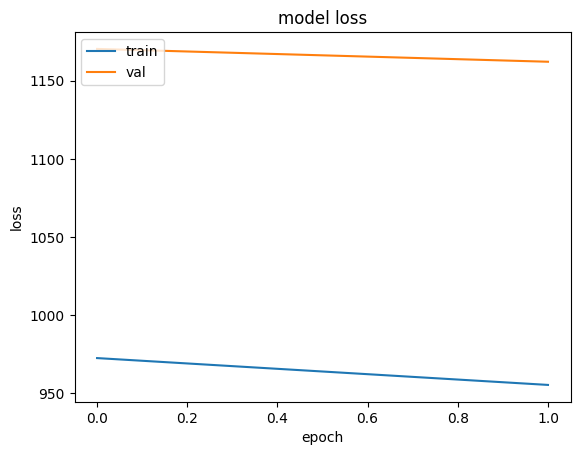

In [89]:
# Plotting the error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [90]:
# Evaluate model
loss, mean_absolute_percentage_error = model.evaluate(test_generator)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


196/196 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - loss: 1164.0009 - mean_absolute_error: 1164.0062


NameError: name 'mean_absolute_error' is not defined

In [96]:
print("Test MAE:", mean_absolute_percentage_error)

Test MAE: 1099.7979736328125


In [91]:
test_label_df.head(20)

,screenshot,price
0,2619790_ss_49e82bd65701112321008fb766f1cbd1f28...,499
1,2619790_ss_812ae723120b7e3f3723331e736d9bd7968...,499
2,2619790_ss_8aa4bfae1466ab5aec6f163a7a2048ff31b...,499
3,2619790_ss_96f9d1488f6e0c86c3f99a9a1732e7c1400...,499
4,2619790_ss_bb35362a034ccb7c7cf910e09f55db60969...,499
5,2619790_ss_c0eacae1f6dff680103364f69afcbc8003c...,499
6,1876880_ss_1326783826956c817f429691b4aed9f2acd...,1849
7,1876880_ss_201c96dd0cb2a8a06f2985fc30cb8168b23...,1849
8,1876880_ss_226045df856c7e0af50dc55a38749218ba5...,1849
9,1876880_ss_29067ed3a902ca11ada83fe431262f1caf4...,1849


Give the predicted price for a game


2703240_ss_b09a37f8a0d9a8a1844fc018826f276cb50c58a3.1920x1080.jpg


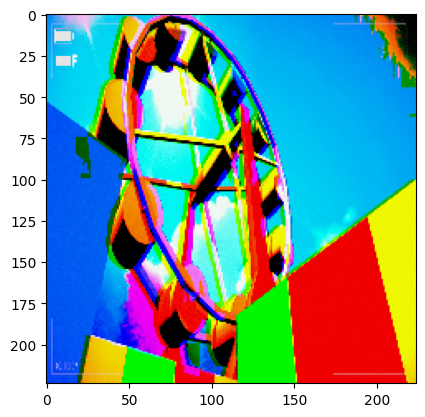

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[534.8773]]
58500


In [95]:
# Define the image location
number = 100
print(test_label_df.loc[number, "screenshot"])
filename = test_label_df.loc[number, "screenshot"]
#'620620_ss_01fe128c1e30f3cc9cee30fa4bbdb7f60e9abe67.1920x1080.jpg'

# Construct the full path to the image
image_path = os.path.join(image_location, filename)

# Load and display the image
img = keras.utils.load_img(image_path, target_size=(224, 224))
plt.imshow(img)
plt.show()

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(predictions)
print(test_label_df.loc[number, "price"])




_________________________________________________________________________________________________________________________